# Overview
### Using machine learning and NLP for spam detection in Twitter

### Beginning Steps
1. Reading Test Data
2. Visualizing Data

### Natural Language Processing Introduction
1. Tokenizing
2. Removing Stop Words
3. Removing Punctuation
4. Stemming

### Creating Pandas DataFrame
1. Indexing
2. Separating Spam from Quality Tweets

### Creating a Word Map
1. Word map for quality tweets
2. Word map for spam Tweets

# Imports

In [3]:
# system packages
import sys
import os

# machine learning packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

# nltk packages
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# wordcloud
from wordcloud import WordCloud
from PIL import Image

%matplotlib inline

# Constants

In [39]:
TRAIN_PATH = 'datasets/train.csv'
TEST_PATH = 'datasets/test.csv'

VOCAB_SIZE = 2500

# Reading Test Data

In [5]:
df_train = pd.read_csv(TRAIN_PATH)
df_train

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


# Data Visualization

In [6]:
# Get Number of Quality Tweets
is_quality = df_train['Type'] == 'Quality'
df_train_quality = df_train[is_quality]
print('num_quality:', df_train_quality.size)

# Get Number of Spam Tweets
is_spam = df_train['Type'] == 'Spam'
df_train_spam = df_train[is_spam]
print('num_spam:', df_train_spam.size)

num_quality: 59632
num_spam: 59544


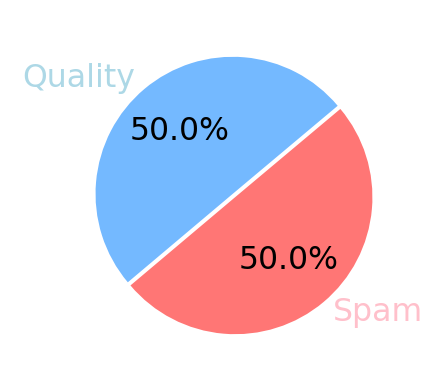

In [7]:
# Creating Pie Chart
category_names = ['Quality', 'Spam']
sizes = [df_train_quality.size, df_train_spam.size]
custom_colors = ['#74b9ff','#ff7675']

plt.figure(figsize=(2, 2), dpi=227)
wedges, labels, percents = plt.pie(sizes, labels=category_names, textprops={'fontsize': 10}, 
                                   startangle=40, autopct='%1.1f%%', colors=custom_colors, 
                                    explode=[0, 0.03])

# label colors
labels[0].set_color('lightblue')
labels[1].set_color('pink')
    
# display pie chart
plt.show()

# Natural Language Processing

1. Convert to lowercase
2. Tokenizing
3. Removing stop words
4. Remove formatting
5. Word Stemming
6. Remove punctuation

## download the NLTK resources (tokenizer & stop words)

tokenizing means splitting up a words in a sentence into individual words

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/berimbolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/berimbolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Tokenizing

In [10]:
msg = 'CSC845 test sentence for team Heavily Caffeinated'
word_tokenize(msg.lower())

['csc845', 'test', 'sentence', 'for', 'team', 'heavily', 'caffeinated']

# Removing Stop Words

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
''' Example of filtering words '''

from functools import reduce
stemmer = PorterStemmer()

msg = 'created CSC845 test sentence for team Heavily Caffeinated. I like pie.'
words = word_tokenize(msg.lower())

# using reduce
filtered_words = reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])
filtered_words

['creat', 'test', 'sentenc', 'team', 'heavili', 'caffein', 'like', 'pie']

# Functions for Tweet Processing

In [13]:
''' Method tokenizes, removes punctuation, removes stop words, and stems'''
def clean_tweet(message, stemmer=PorterStemmer(),
                stop_words=set(stopwords.words('english')), stem=False):
    words = word_tokenize(message.lower())
    if stem:
        return reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])
    else:
        return reduce(lambda a,b: a + [b] if b not in stop_words and b.isalpha() else a, words, [])

In [14]:
''' testing function '''

clean_tweet(msg)


['created',
 'test',
 'sentence',
 'team',
 'heavily',
 'caffeinated',
 'like',
 'pie']

# Slicing Dataframes

In [15]:
''' Get a specific entry '''
print(df_train.iat[0,0])

Good Morning Love  @LeeBrown_V


### Checking runtime

In [16]:
%%time

# Creating nested lists
nested_list = df_train.Tweet.apply(clean_tweet)
nested_list_stemmed = df_train.Tweet.apply(clean_tweet, stem=True)

# flattening the list
flat_list = [item for sublist in nested_list for item in sublist]

CPU times: user 5.56 s, sys: 3.35 ms, total: 5.57 s
Wall time: 5.57 s


In [17]:
nested_list

0                                    [good, morning, love]
1                   [realdonaldtrump, usnavy, rip, heroes]
2        [following, news, understand, eff, dumbest, th...
3           [paper, scissors, glue, http, papercraft, diy]
4        [didyouknow, mahatma, gandhi, made, brief, vis...
                               ...                        
14894    [allwentwrongwhen, told, hair, stylist, go, nuts]
14895                                         [like, care]
14896    [miami, graham, nash, live, parker, playhouse,...
14897                    [bethannhamilton, business, good]
14898     [chasing, success, space, cadetz, listen, https]
Name: Tweet, Length: 14899, dtype: object

## Using Logic to Slice DataFrames

In [18]:
doc_ids_spam = df_train[df_train.Type == 'Spam'].index
doc_ids_quality = df_train[df_train.Type == 'Quality'].index

In [19]:
doc_ids_spam

Int64Index([    1,     5,     8,     9,    10,    11,    12,    13,    14,
               15,
            ...
            14878, 14880, 14881, 14882, 14886, 14891, 14893, 14894, 14896,
            14898],
           dtype='int64', length=7443)

# Subsetting a Series with an Index
#### Purpose of this is to separate the spam from the quality words

In [20]:
nested_list_quality = nested_list.loc[doc_ids_quality]
nested_list_quality_stemmed = nested_list_stemmed.loc[doc_ids_quality]
nested_list_quality.tail()

14889    [need, hear, tvvins, singing, version, live, h...
14890    [know, add, goals, google, calendar, kinda, co...
14892    [actually, last, national, referendum, charlot...
14895                                         [like, care]
14897                    [bethannhamilton, business, good]
Name: Tweet, dtype: object

In [21]:
nested_list_spam = nested_list.loc[doc_ids_spam]
nested_list_spam_stemmed = nested_list_stemmed.loc[doc_ids_spam]
nested_list_spam.tail()

14891           [loading, back, moods, christmasaftermath]
14893    [kendrys, morales, hits, homerun, royals, snap...
14894    [allwentwrongwhen, told, hair, stylist, go, nuts]
14896    [miami, graham, nash, live, parker, playhouse,...
14898     [chasing, success, space, cadetz, listen, https]
Name: Tweet, dtype: object

# Creating array of Quality Words

In [22]:
# Non spam tweets
flat_list_quality = [item for sublist in nested_list_quality for item in sublist]
flat_list_quality_stemmed = [item for sublist in nested_list_quality_stemmed for item in sublist]
normal_words = pd.Series(flat_list_quality).value_counts() # unique words
normal_words_stemmed = pd.Series(flat_list_quality_stemmed).value_counts() # unique words
normal_words.shape[0] # total num of unique words

14539

# Creating array of Spam Words

In [23]:
# spam tweets
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
flat_list_spam_stemmed = [item for sublist in nested_list_spam_stemmed for item in sublist]
spam_words = pd.Series(flat_list_spam).value_counts() # unique words
spam_words_stemmed = pd.Series(flat_list_spam_stemmed).value_counts() # unique words
print('Total num of unique words:', spam_words.shape[0])

Total num of unique words: 15081


# Creating a World Cloud for Normal Words

In [24]:
''' Creating map of words because word map needs a string of words '''
normal_str = ' '.join([word for word in normal_words.index.to_list()])

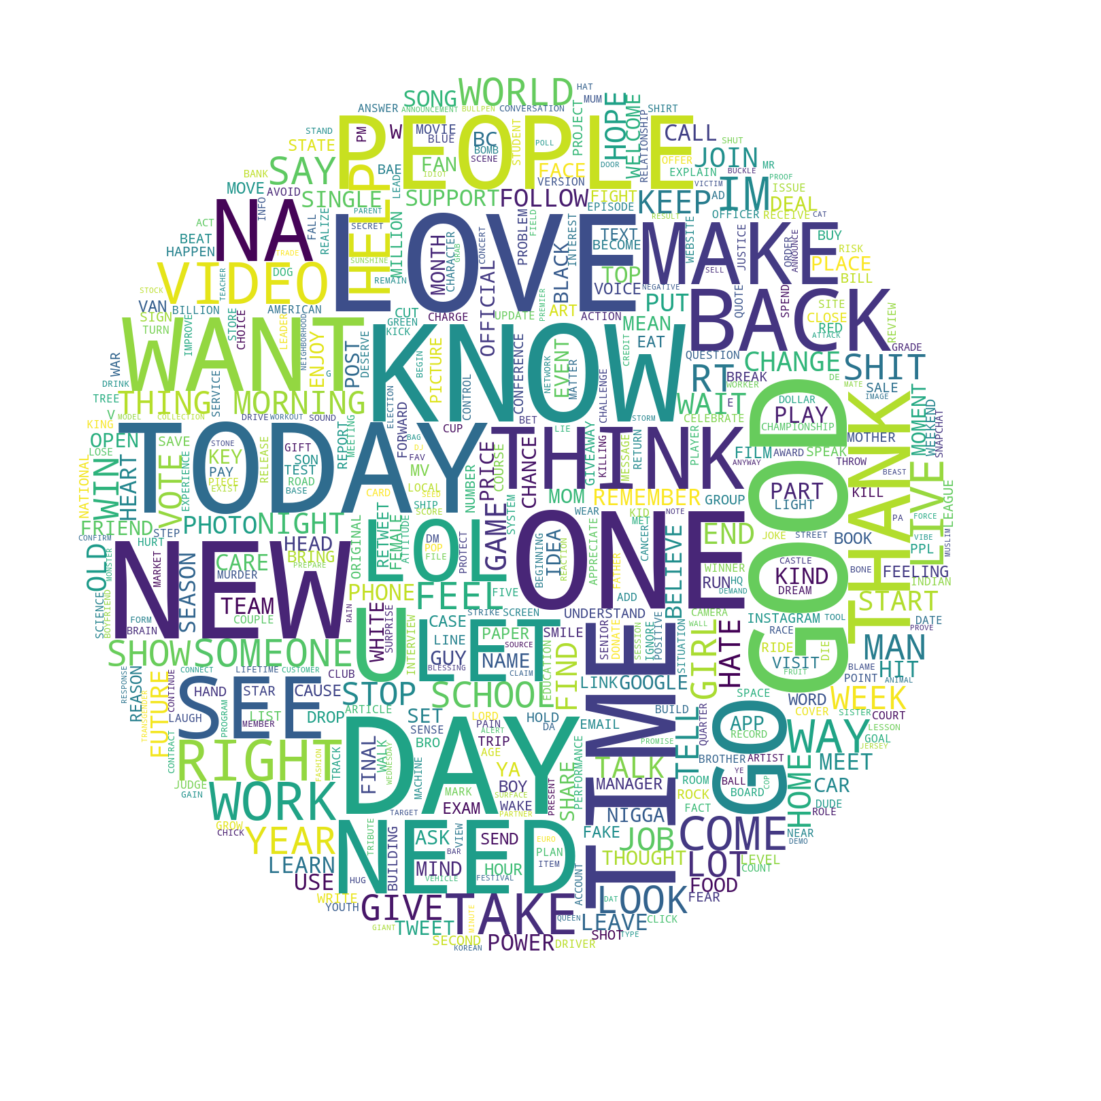

In [25]:
# open png file and creating mask
icon = Image.open('circle.jpg').convert("RGBA")
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) # converts the image object to an array

# Creating word cloud
plt.figure(figsize=[100, 20])
world_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=500)
world_cloud.generate(normal_str.upper())
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Creating a World Cloud for Spam Words

In [26]:
''' Creating map of words because word map needs a string of words '''
spam_str = ' '.join([word for word in spam_words.index.to_list()])

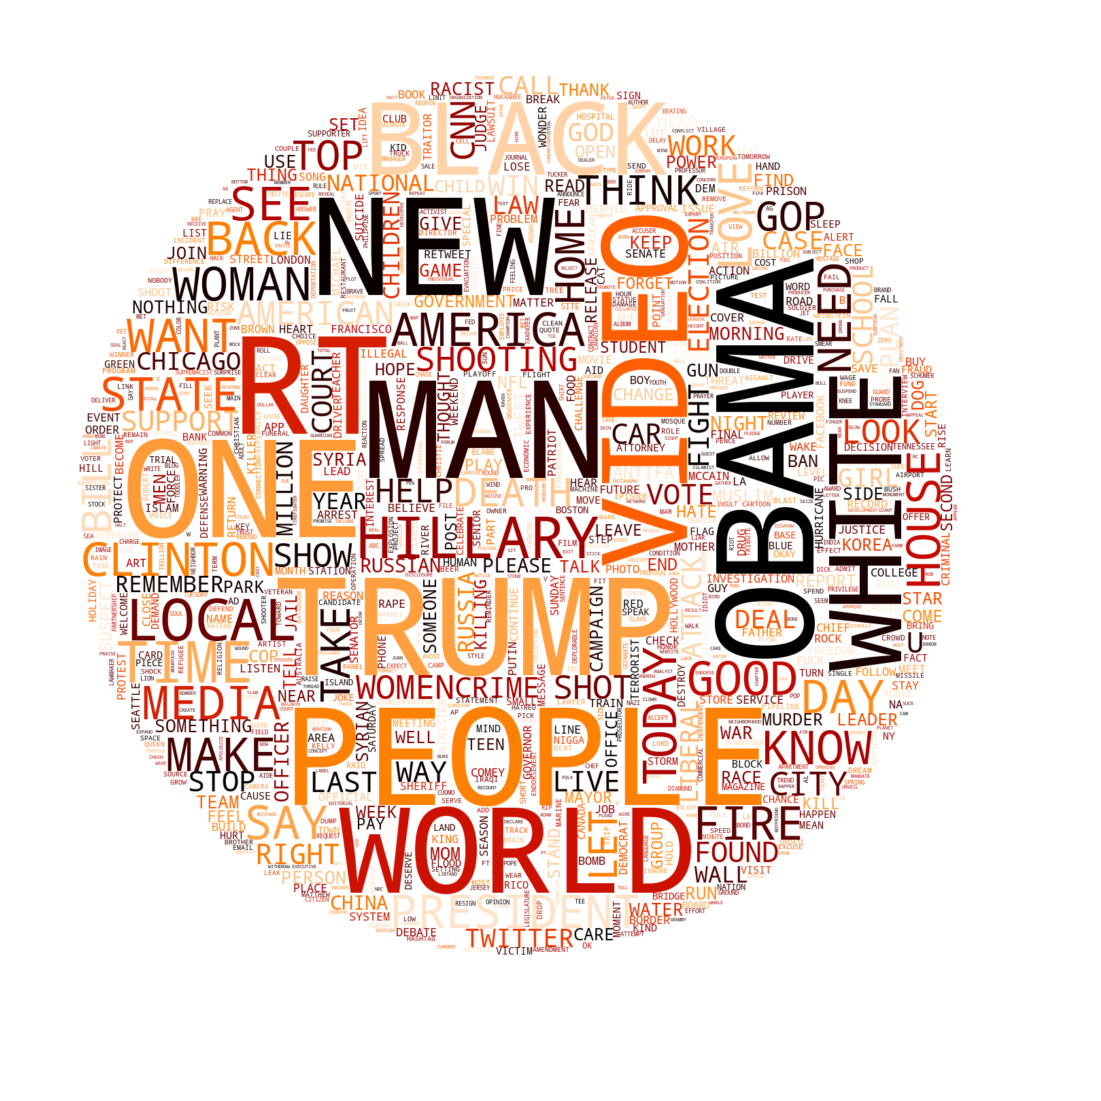

In [27]:
# open png file and creating mask
icon = Image.open('circle.jpg').convert("RGBA")
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) # converts the image object to an array

# Creating word cloud
plt.figure(figsize=[100, 20])
world_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=1000,
                       colormap='gist_heat')
world_cloud.generate(spam_str.upper())
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
''' Shape of image mask '''
rgb_array.shape

(1600, 1600, 3)

# Generate Vocabulary & Dictionary

In [35]:
nested_list_stemmed = df_train.Tweet.apply(clean_tweet, stem=True)
flat_list_stemmed = [item for sublist in nested_list_stemmed for item in sublist]
flat_list_stemmed[:10]

['good',
 'morn',
 'love',
 'realdonaldtrump',
 'usnavi',
 'rip',
 'hero',
 'follow',
 'news',
 'understand']

In [42]:
unique_words = pd.Series(flat_list_stemmed).value_counts()
print('Nr of unique words', unique_words.shape[0])

Nr of unique words 18862


In [59]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:50])

Most common words: 
 http     8459
trump     646
news      619
get       504
new       492
like      474
rt        410
love      393
go        380
day       357
one       357
peopl     344
say       339
time      327
make      325
know      305
thank     287
want      286
man       280
look      270
need      270
good      268
us        266
via       248
video     240
think     240
polic     239
today     238
take      237
see       231
world     231
year      226
break     222
happi     221
sport     220
polit     214
come      205
got       204
kill      203
show      199
thing     197
would     194
let       193
vote      193
right     192
back      192
call      190
life      190
work      190
u         189
dtype: int64


# Create Vocabulary DataFrame with a WORD_ID

In [48]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,trump
2,news
3,get
4,new


# Save the vocab as a CSV file

In [51]:
vocab.to_csv('datasets/vocab.csv', index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

# Checking if a word is part of the vocabulary

In [58]:
'love' in set(vocab.VOCAB_WORD)

True